#**Deteksi dan Handling Outlier**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Library
import os
import pandas as pd

In [ ]:
# Mengakses link ke google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Mendefinisikan data path
path_data = '/content/'

In [ ]:
# Membaca directory
import os
os.listdir(path_data)

['.config',
 '.ipynb_checkpoints',
 'drive',
 'salesweekly.csv',
 'salesmonthly.csv',
 'airquality.csv',
 'winequality.csv',
 'sample_data']

In [2]:
# Import Packages
import pandas as pd
import numpy as np
import statistics
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

## Outlier

Outlier merupakan sesuatu yang langka atau observasi yang tidak biasa yang muncul pada salah satu titik ekstrim dari sebagian besar data. Titik ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya, misalnya nilainya terlalu kecil atau terlalu besar

### Mendeteksi Outlier Multivariate

Untuk mendeteksi outlier multivariate digunakan jarak Mahalanobis.

Jarak mahalanobis diperoleh dengan menghitung jarak tiap observasi terhadap pusat datanya. \
Persamaan: \
$d_i^2$ = $(x_i-\mu)Σ^{-1}(x_i-\mu),i=1,2,3,...,p$ \
Langkah-langkah mendeteksi pencilan dengan jarak Mahalanobis (Johnson, dan Wichern, 2007):
1. Menentukan nilai vektor rata-rata ($\mu$)
2. Menentukan nilai matriks varians kovarians ($\Sigma$)
3. Menentukan nilai jarak Mahalanobis pada setiap pengamatan dengan vektor rata-rata
4. Mengurutkan nilai $d_i^2$ dari kecil ke besar $d_1^2$ < $d_2^2$ < .. < $d_n^2$
5.  jarak Mahalanobis dievaluasi dengan menggunakan Chi square dengan derajat bebas (df) sejumlah variabel yang digunakan. $d_i^2$ >= $𝛘_{p,1-\alpha}^2$


In [3]:
# Load dataset
df= pd.read_csv('airquality.csv', sep=",", decimal='.' )
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


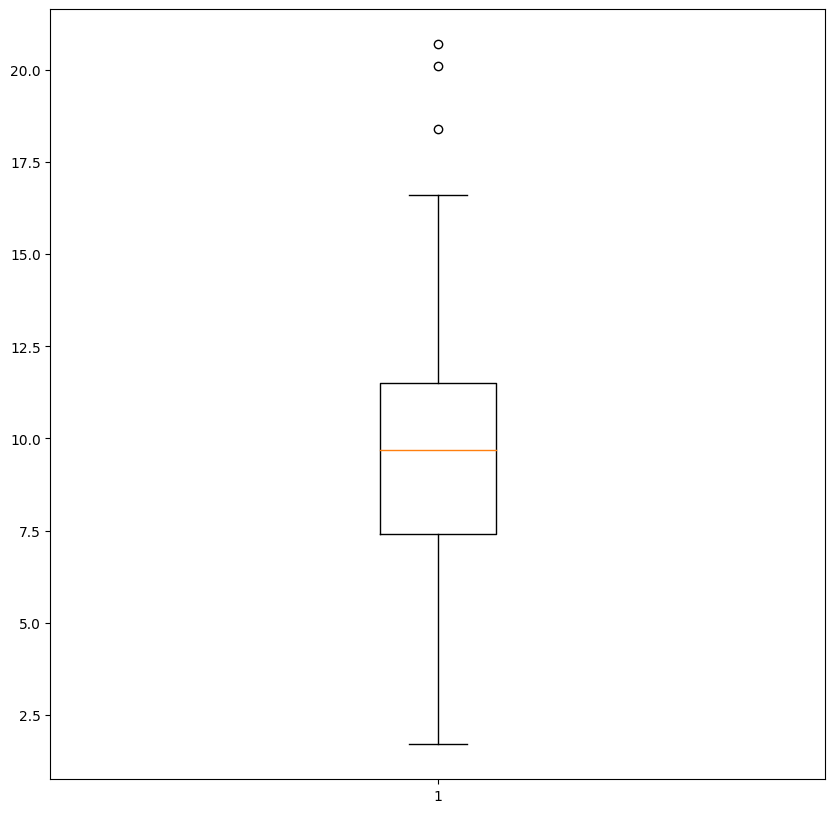

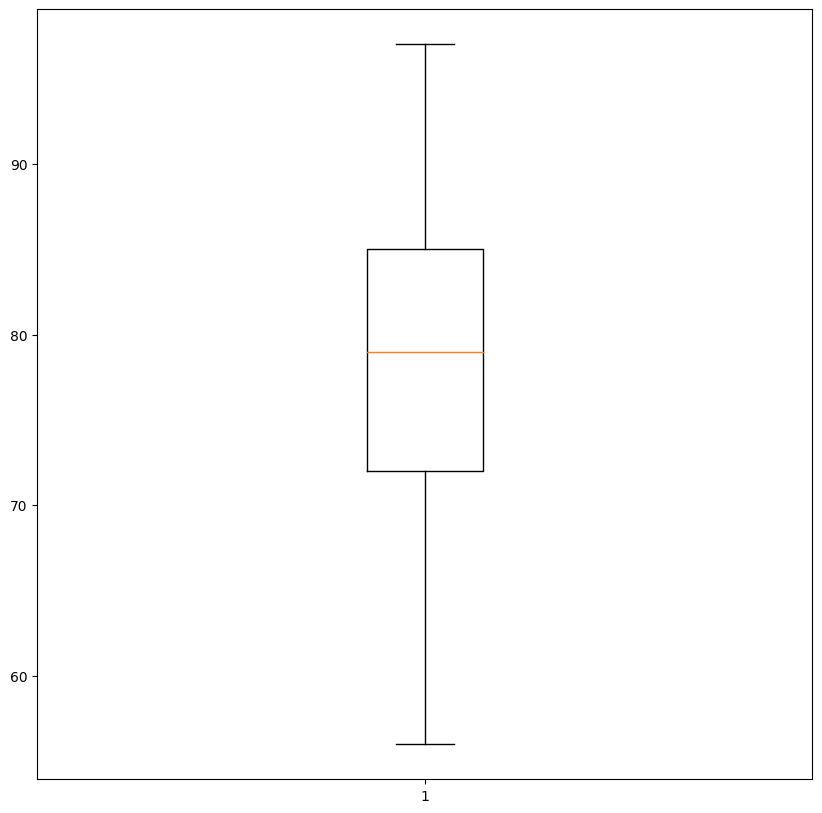

In [4]:
plt.figure(figsize=(10,10))
plt.boxplot(df["Wind"])
plt.show()
plt.figure(figsize=(10,10))
plt.boxplot(df["Temp"])
plt.show()

In [5]:
plt.boxplot()

TypeError: boxplot() missing 1 required positional argument: 'x'

In [6]:
df = df[['Ozone', 'Temp']]
df = df.dropna()
df = df.to_numpy()

### Menghitung dengan Jarak Mahalanobis

In [7]:
# Covariance matrix
covariance  = np.cov(df , rowvar=False)
print("Matcov: ", covariance)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1) # inverse matrix
print("Inverse Matcov: ", covariance_pm1)

# Center point
centerpoint = np.mean(df , axis=0)

Matcov:  [[1088.20052474  218.52121439]
 [ 218.52121439   89.97443778]]
Inverse Matcov:  [[ 0.00179379 -0.0043566 ]
 [-0.0043566   0.02169515]]


In [ ]:
distances = []
for i, val in enumerate(df):
    print("Hitung Jarak Observasi ke ", str(i))
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
    print("Selesai dan selanjutnya")
distances = np.array(distances)

Hitung Jarak Observasi ke  0
Selesai dan selanjutnya
Hitung Jarak Observasi ke  1
Selesai dan selanjutnya
Hitung Jarak Observasi ke  2
Selesai dan selanjutnya
Hitung Jarak Observasi ke  3
Selesai dan selanjutnya
Hitung Jarak Observasi ke  4
Selesai dan selanjutnya
Hitung Jarak Observasi ke  5
Selesai dan selanjutnya
Hitung Jarak Observasi ke  6
Selesai dan selanjutnya
Hitung Jarak Observasi ke  7
Selesai dan selanjutnya
Hitung Jarak Observasi ke  8
Selesai dan selanjutnya
Hitung Jarak Observasi ke  9
Selesai dan selanjutnya
Hitung Jarak Observasi ke  10
Selesai dan selanjutnya
Hitung Jarak Observasi ke  11
Selesai dan selanjutnya
Hitung Jarak Observasi ke  12
Selesai dan selanjutnya
Hitung Jarak Observasi ke  13
Selesai dan selanjutnya
Hitung Jarak Observasi ke  14
Selesai dan selanjutnya
Hitung Jarak Observasi ke  15
Selesai dan selanjutnya
Hitung Jarak Observasi ke  16
Selesai dan selanjutnya
Hitung Jarak Observasi ke  17
Selesai dan selanjutnya
Hitung Jarak Observasi ke  18
Selesai 

In [ ]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    print("Hitung Jarak Observasi ke ", str(i))
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
    print("Selesai dan selanjutnya")
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)
# array([24, 35, 67, 81])

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])
# [[115.  79.], [135.  84.], [122.  89.], [168.  81.]]

--- Index Outliers ----
(array([24, 35, 67, 81]),)
--- Observasi terdeteksi sebagai outlier -----
[[115.  79.]
 [135.  84.]
 [122.  89.]
 [168.  81.]]


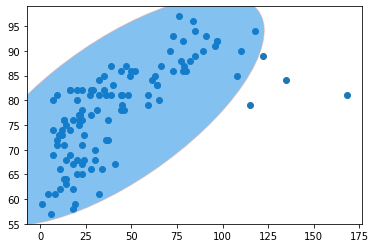

In [ ]:
## ellipse dimensions 
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

### Handling Multivariate outlier

In [ ]:
remove_outlier=df[distances <= cutoff,:]

In [ ]:
remove_outlier

array([[ 41.,  67.],
       [ 36.,  72.],
       [ 12.,  74.],
       [ 18.,  62.],
       [ 28.,  66.],
       [ 23.,  65.],
       [ 19.,  59.],
       [  8.,  61.],
       [  7.,  74.],
       [ 16.,  69.],
       [ 11.,  66.],
       [ 14.,  68.],
       [ 18.,  58.],
       [ 14.,  64.],
       [ 34.,  66.],
       [  6.,  57.],
       [ 30.,  68.],
       [ 11.,  62.],
       [  1.,  59.],
       [ 11.,  73.],
       [  4.,  61.],
       [ 32.,  61.],
       [ 23.,  67.],
       [ 45.,  81.],
       [ 37.,  76.],
       [ 29.,  82.],
       [ 71.,  90.],
       [ 39.,  87.],
       [ 23.,  82.],
       [ 21.,  77.],
       [ 37.,  72.],
       [ 20.,  65.],
       [ 12.,  73.],
       [ 13.,  76.],
       [ 49.,  85.],
       [ 32.,  81.],
       [ 64.,  83.],
       [ 40.,  83.],
       [ 77.,  88.],
       [ 97.,  92.],
       [ 97.,  92.],
       [ 85.,  89.],
       [ 10.,  73.],
       [ 27.,  81.],
       [  7.,  80.],
       [ 48.,  81.],
       [ 35.,  82.],
       [ 61.,

### Mendeteksi Outlier Univariate

Terdapat 3 cara mendeteksi outlier yaitu dengan boxplot, Z-score dan IQR (Inter Quartile Range).
Diberikan data berikut sebagai contoh.

In [ ]:
sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

In [ ]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(sample))
print("Median data : ",statistics.median(sample))

Mean data :  20.083333333333332
Median data :  14.0


Text(0.5, 0, 'Sample')

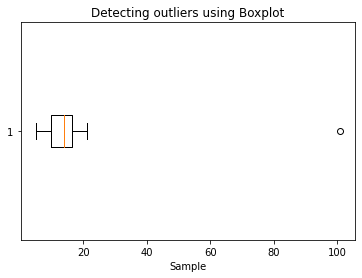

In [ ]:
# Membuat Boxplot untuk mendeteksi outlier
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

Boxplot di atas menunjukkan satu titik yang sangat jauh sehingga terdeteksi ada outlier. Kemudian untuk mengetahui mana yang menjadi outlier, maka dibuat suatu fungsi pendeteksian menggunakan IQR (Inter Quartile Range).

In [ ]:
# Mendeteksi Outlier dengan Z-score
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers_zscore = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers_zscore)

Outliers from Z-scores method:  [101]


In [ ]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [101]


Baik dengan cara boxplot, z-score maupun IQR, terdeteksi satu outlier yaitu nilai 101.

### Mengatasi Outlier

Terdapat beberapa cara yang dilakukan untuk mengatasi outlier, yaitu dengan penghapusan data outlier dan dengan penggantian menggunakan nilai mean atau median.

Cara 1 : Menghapus data outlier

In [ ]:
#  Deleting
tr = []
for j in sample:
    f = j in sample_outliers
    if f is False:
        tr.append(j)
print(tr)

[15, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]


In [ ]:
print("Mean data setelah penghapusan: ",statistics.mean(tr))
print("Median data setelah penghapusan: ",statistics.median(tr))

Mean data setelah penghapusan:  12.727272727272727
Median data setelah penghapusan:  13


Text(0.5, 0, 'Sample')

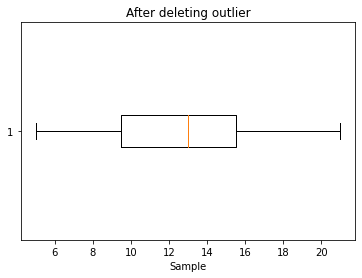

In [ ]:
plt.boxplot(tr, vert=False)
plt.title("After deleting outlier")
plt.xlabel('Sample')

Setelah outlier dihapus dari data, sudah tidak ada lagi outlier yang tampak pada boxplot.

Cara 2 : Mengganti dengan nilai batas

Titik data yang lebih kecil dari persentil ke-10 diganti dengan nilai persentil ke-10 dan titik data yang lebih besar dari persentil ke-90 diganti dengan nilai persentil ke-90.

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = []
for k in sample:
    if k<tenth_percentile:
        k=tenth_percentile
    elif k>ninetieth_percentile:
        k=ninetieth_percentile
    else:
        k=k
    b.append(k)
print("New sample:",b)

7.199999999999999 20.7
New sample: [15, 20.7, 18, 7.199999999999999, 13, 16, 11, 20.7, 7.199999999999999, 15, 10, 9]


sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

Dengan cara ini, walaupun outlier yang terdeteksi hanya ada 1, tetapi nilai yang diganti bisa jadi tidak hanya yang menjadi outlier karena tergantung batas yang digunakan. Menggunakan 10th percentile dan 90th percentile, nilai 10th percentile adalah 7.19 dan 90th percentile adalah 20.7. Sehingga nilai yang kurang dari 7.19 akan diganti dengan nilai 7.19, contohnya pada data sample, nilai 7 dan 5 terganti dengan 7.19.

Begitu pula dengan nilai yang lebih dari 20.7 akan terganti dengan nilai 20.7, seperti nilai 21 dan 101 yang terganti dengan 20.7. Walaupun yang menjadi outlier hanya nilai 101, tetapi ada nilai lain yang juga terganti dengan batas tersebut. Oleh karena itu, cara ini jarang digunakan dalam penelitian.

In [ ]:
# Menghitung nilai mean dan median data setelah replacing batas
print("Mean data : ",statistics.mean(sample))
print("Median data : ",statistics.median(sample))
print("Mean data setelah replacing batas tertentu : ",statistics.mean(b))
print("Median data setelah replacing batas tertentu: ",statistics.median(b))

Mean data :  20.083333333333332
Median data :  14.0
Mean data setelah replacing batas tertentu :  13.566666666666666
Median data setelah replacing batas tertentu:  14.0


Nilai rata-rata setelah outlier di atasi dengan cara 2 ini berubah dari 20.08 menjadi 13.56 dengan nilai median yang sama.

Text(0.5, 0, 'Sample')

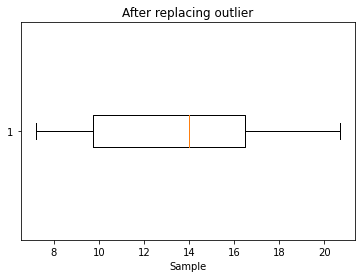

In [ ]:
plt.boxplot(b, vert=False)
plt.title("After replacing outlier")
plt.xlabel('Sample')

Sudah tidak terdeteksi outlier pada boxplot setelah outlier diatasi dengan penggantian batas tertentu.

Cara 3 : Mengganti dengan nilai median

In [ ]:
e = []
for y in sample:
    ff = y in sample_outliers
    if ff is True:
        y=statistics.median(sample)
    else:
        y=y
    e.append(int(y))
print(e)

[15, 14, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]


In [ ]:
print("Mean data setelah penggantian nilai median: ",statistics.mean(e))
print("Median data setelah penggantian nilai median: ",statistics.median(e))

Mean data setelah penggantian nilai median:  12.833333333333334
Median data setelah penggantian nilai median:  13.5


Text(0.5, 0, 'Sample')

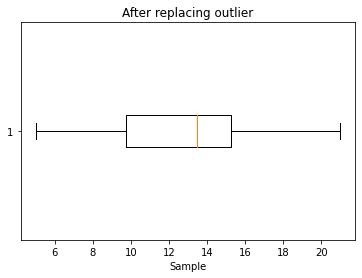

In [ ]:
plt.boxplot(e, vert=False)
plt.title("After replacing outlier")
plt.xlabel('Sample')

Setelah outlier diganti median data, sudah tidak ada lagi outlier yang tampak pada boxplot.

#Implementasi Handling Outlier

### Sales Monthly

Berikut akan digunakan data penjualan bulanan obat yang diambil dari https://www.kaggle.com/milanzdravkovic/pharma-sales-data. 

Dataset dibangun dari dataset awal yang terdiri dari 600000 data transaksi yang dikumpulkan dalam 6 tahun (periode 2014-2019), menunjukkan tanggal dan waktu penjualan, nama merek obat farmasi dan jumlah yang dijual, diekspor dari sistem Point-of-Sale secara individu farmasi. Kelompok obat yang dipilih dari kumpulan data (57 obat) diklasifikasikan ke dalam kategori Sistem Klasifikasi Anatomical Therapeutic Chemical (ATC) berikut:

1. M01AB - Produk anti-inflamasi dan antirematik, non-steroid, turunan asam asetat dan zat terkait
2. M01AE - Produk anti-inflamasi dan antirematik, non-steroid, turunan asam propionat
3. N02BA - Analgesik dan antipiretik lainnya, Asam salisilat dan turunannya
4. N02BE/B - Analgesik dan antipiretik lainnya, Pyrazolones dan Anilides
5. N05B - ​​Obat Psikoleptik, Obat Ansiolitik
6. N05C - Obat Psikoleptik, Obat Hipnotik dan Sedatif
7. R03 - Obat untuk penyakit saluran napas obstruktif
8. R06 - Antihistamin untuk penggunaan sistemik

In [ ]:
df_salesmonthly = pd.read_csv('C:/Users/Salafiyah/Downloads/outlier/Data/salesmonthly.csv')
df_salesmonthly

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [ ]:
# Load Data
df_salesmonthly = pd.read_csv(path_data+'salesmonthly.csv')
df_salesmonthly.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


Text(0.5, 0, 'Sample')

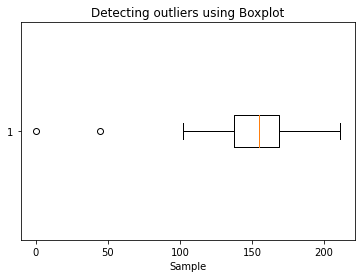

In [ ]:
# Deteksi dengan boxplot
plt.boxplot(list(df_salesmonthly.M01AB), vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

Dari boxplot dapat dilihat bahwa ada 2 titik yang jauh dari boxplot, sehingga data terdeteksi ada 2 data yang dianggap sebagai outlier.

In [ ]:
# Deteksi outlier dengan Z-score
monthly_outliers_z = detect_outliers_zscore(list(df_salesmonthly.M01AB))
print("Outliers from Z-score method: ", monthly_outliers_z)

Outliers from Z-score method:  [0.0, 44.37000000000001]


In [ ]:
# Deteksi outlier dengan IQR
monthly_outliers = detect_outliers_iqr(list(df_salesmonthly.M01AB))
print("Outliers from IQR method: ", monthly_outliers)

Outliers from IQR method:  [0.0, 44.37000000000001]


Nilai dari data yang dianggap sebagai outlier adalah 0 dan 44.37

Cara 1 : Deleting

In [ ]:
# Deleting
tr = []
for j in list(df_salesmonthly.M01AB):
    f = j in monthly_outliers
    if f is False:
        tr.append(j)

In [ ]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df_salesmonthly.M01AB)))
print("Banyaknya data setelah diatasi outlier: ",len(tr))

Banyaknya data sebelum diatasi outlier:  70
Banyaknya data setelah diatasi outlier:  68


Setelah 2 outlier dihapus, data berubah dari 70 menjadi 68.

In [ ]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df_salesmonthly.M01AB)))
print("Median data : ",statistics.median(list(df_salesmonthly.M01AB)))
print("Mean data setelah deleting : ",statistics.mean(tr))
print("Median data setelah deleting: ",statistics.median(tr))

Mean data :  149.99200000000005
Median data :  154.63500000000005
Mean data setelah deleting :  153.75102941176473
Median data setelah deleting:  155.18000000000004


Setelah dilakukan penghapusan outlier, median sebelum dan sesudah dilakukan penghapusan data tidak jauh berbeda yaitu dari 154.6 menjadi 155.2. Sedangkan nilai rata-rata sebelum dan sesudah penghapusan outlier berubah dari 149.9 menjadi 153.8.

Text(0.5, 0, 'M01AB')

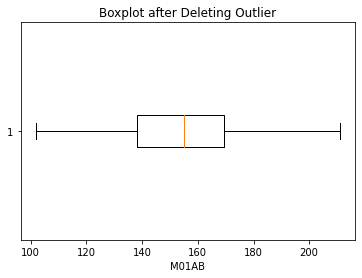

In [ ]:
# Boxplot setelah penghapusan data
plt.boxplot(tr, vert=False)
plt.title("Boxplot after Deleting Outlier")
plt.xlabel('M01AB')

Setelah dilakukan penghapusan outlier, sudah tidak terdeteksi adanya outlier yang dapat dilihat dari boxplot di atas.

Cara 2 : Replace dengan Median Data

In [ ]:
e = []
for y in list(df_salesmonthly.M01AB):
    ff = y in monthly_outliers
    if ff is True:
        y=statistics.median(list(df_salesmonthly.M01AB))
    else:
        y=y
    e.append(y)

In [ ]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df_salesmonthly.M01AB)))
print("Median data : ",statistics.median(list(df_salesmonthly.M01AB)))
print("Mean data setelah replacing median : ",statistics.mean(e))
print("Median data setelah replacing median: ",statistics.median(e))

Mean data :  149.99200000000005
Median data :  154.63500000000005
Mean data setelah replacing median :  153.77628571428576
Median data setelah replacing median:  154.69250000000005


Setelah dilakukan penggantian outlier dengan median data, median sebelum dan sesudah dilakukan penggantian median data tidak berbeda yaitu 154.6. Sedangkan nilai rata-rata sebelum dan sesudah penggantian nilai median berubah dari 149.9 menjadi 153.8.

Text(0.5, 0, 'M01AB')

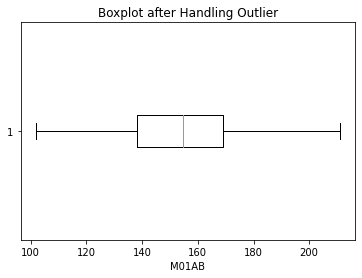

In [ ]:
# Boxplot setelah replace median
plt.boxplot(e, vert=False)
plt.title("Boxplot after Handling Outlier")
plt.xlabel('M01AB')

Setelah dilakukan penggantian outlier dengan nilai median, dari boxplot tampak sudah tidak terdeteksi adanya outlier. Sehingga outlier berhasil diatasi.

### Latihan Yuk

Lakukan deteksi outlier pada kolom yang lain, jika ada outlier atasi dengan cara yang sudah dipelajari, bagaimana hasilnya?